<a href="https://colab.research.google.com/github/idowujames/Accenture_Data_Analytics_Internship/blob/main/Accenture_Data_Analytics_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analytics Internship by Accenture

In [1]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

### **After going throug the datasets, A quick wrangle function will be used to do a quick cleaning of the datasets as they are been loaded.**

In [2]:
# Data wrangle function

def wrangle(data):

  # load dataset
  df = pd.read_csv(data)

  # Converting object datatype to datatime
  if 'Datetime' in df.columns:
    df['Datetime'] =  pd.to_datetime(df['Datetime'])

  # dropping User ID column because it is not neccesary in for our analysis
  if 'User ID' in df.columns:
    df = df.drop(columns= 'User ID')

  # dropping URL column as it is not neccesary in for our analysis
  if 'URL' in df.columns:
    df = df.drop(columns= 'URL')

  # dropping Unnamed column because it is seems to be an error
  if 'Unnamed: 0' in df.columns:
    df = df.drop(columns= 'Unnamed: 0')

  # dropping missing columns from the dataset
  df = df.dropna()

  return df








## Loading the datasets using the wrangle function

In [3]:
# loading datasets

reactions = wrangle('Reactions.csv')
reaction_types = wrangle('ReactionTypes.csv')
content = wrangle('Content.csv')

### Viewing of each dataset to make sure it was loaded and wrangled correctly

In [4]:
print(reactions.shape)
print(reactions.info())
reactions.head()

(24573, 3)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 1 to 25552
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Content ID  24573 non-null  object        
 1   Type        24573 non-null  object        
 2   Datetime    24573 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 767.9+ KB
None


,Content ID,Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


In [5]:
print(reaction_types.shape)
print(reaction_types.info())
reaction_types.head()

(16, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Type       16 non-null     object
 1   Sentiment  16 non-null     object
 2   Score      16 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 512.0+ bytes
None


,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [6]:
print(content.shape)
print(content.info())
content.head()

(1000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  1000 non-null   object
 1   Type        1000 non-null   object
 2   Category    1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB
None


,Content ID,Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [7]:
content['Category'].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', '"culture"', 'Fitness', '"studying"',
       'Veganism', '"animals"', 'Travel', '"soccer"', 'Education',
       '"dogs"', 'Technology', 'Soccer', '"tennis"', 'Culture', '"food"',
       'Food', '"technology"', 'Healthy Eating', '"cooking"', 'Science',
       '"public speaking"', '"veganism"', 'Public Speaking', '"science"'],
      dtype=object)

## Exploring the datasets a bit more

### Reactions dataset

In [8]:
reactions.head()

,Content ID,Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


In [9]:
reactions['Type'].value_counts()

heart          1622
scared         1572
peeking        1559
hate           1552
interested     1549
dislike        1548
adore          1548
want           1539
love           1534
disgust        1526
like           1520
super love     1519
indifferent    1512
cherish        1501
worried        1497
intrigued      1475
Name: Type, dtype: int64

In [10]:
reactions['Type'].nunique()

16

In [11]:
print(f' Dataset from {reactions.Datetime.min()} to {reactions.Datetime.max()}')

 Dataset from 2020-06-18 08:07:22 to 2021-06-18 08:30:29


#### Reaction Type Dataset

In [12]:
reaction_types.head()

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [13]:
print(reaction_types['Score'].unique())
reaction_types['Sentiment'].unique()

[60 70  0  5 30 20 65 75 72 50 10 45 35 15 12]


array(['positive', 'negative', 'neutral'], dtype=object)

#### Content Dataset

In [14]:
content.head()

,Content ID,Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [15]:
content['Type'].unique()

array(['photo', 'video', 'GIF', 'audio'], dtype=object)

It's visible that the Type column in the content dataframe stores a different type of data as opposed to the reaction and reaction_type dataframes.

It's best to rename the columns so as not to cause unexpected issues when merging the dataframes

In [16]:
# Renaming the Type column in content dataframe
content = content.rename(columns={'Type': 'Content Type'})

# Renaming the Type column in both reactions and reaction_type dataframes to be better descriptive
reaction_types = reaction_types.rename(columns={'Type': 'Reaction Type'})
reactions = reactions.rename(columns={'Type': 'Reaction Type'})

In [17]:
content['Category'].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', '"culture"', 'Fitness', '"studying"',
       'Veganism', '"animals"', 'Travel', '"soccer"', 'Education',
       '"dogs"', 'Technology', 'Soccer', '"tennis"', 'Culture', '"food"',
       'Food', '"technology"', 'Healthy Eating', '"cooking"', 'Science',
       '"public speaking"', '"veganism"', 'Public Speaking', '"science"'],
      dtype=object)

It appears there are duplicate values in the category section of the content dataset as some values are duplicated using different Alphabet cases(lower & upper cases) and some have quotation marks around them while other's don't.  

In [18]:
content['Category'] = (
                        content['Category']
                        .str.replace('"','')
                        .str.capitalize()
                       )

content['Category'].unique()

array(['Studying', 'Healthy eating', 'Technology', 'Food', 'Cooking',
       'Dogs', 'Soccer', 'Public speaking', 'Science', 'Tennis', 'Travel',
       'Fitness', 'Education', 'Veganism', 'Animals', 'Culture'],
      dtype=object)

## Joining the datasets together

In [19]:
# Merge reactions and content dataframes
merged_df = pd.merge(reactions, content, how='left', left_on='Content ID', right_on='Content ID')

# Merge the resulting dataframe with reaction_types dataframe
final_df = pd.merge(merged_df, reaction_types, left_on='Reaction Type', right_on='Reaction Type', how='left')

print(final_df.info())
final_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 0 to 24572
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Content ID     24573 non-null  object        
 1   Reaction Type  24573 non-null  object        
 2   Datetime       24573 non-null  datetime64[ns]
 3   Content Type   24573 non-null  object        
 4   Category       24573 non-null  object        
 5   Sentiment      24573 non-null  object        
 6   Score          24573 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.5+ MB
None


,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying,positive,30


# Explanatory Analytics - Uncovering Insights from the dataset

#### **Getting the Top 5 performing categories in the dataset**

In [20]:
top_performing = final_df.groupby('Category')['Score'].sum().sort_values(ascending=False)[:5]

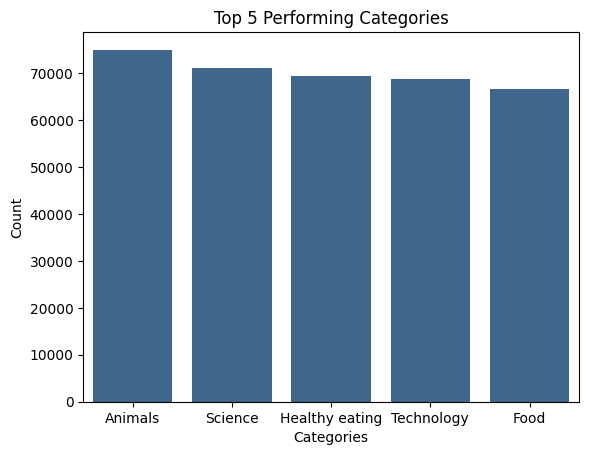

In [21]:
top_performing = final_df.groupby('Category')['Score'].sum().sort_values(ascending=False)[:5]


sns.barplot(y = top_performing.values, x = top_performing.index, color=(0.2, 0.4, 0.6, 0.6))
plt.title('Top 5 Performing Categories')
plt.xlabel('Categories')
plt.ylabel('Count')

plt.show()


#### **Getting the unique categories in the dataset and graphing them**

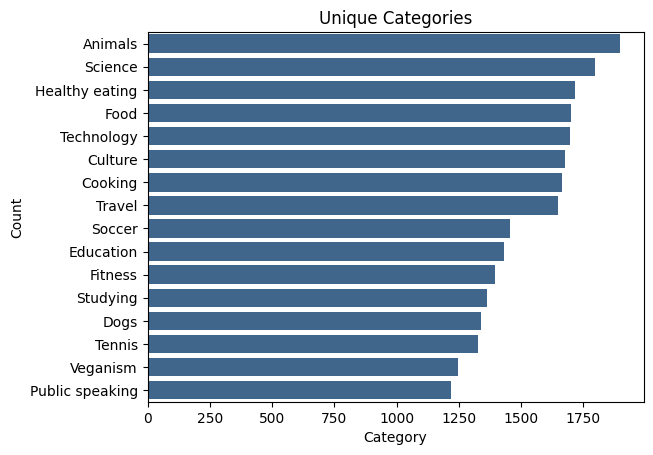

In [22]:
# Count the occurrences of each category
category_counts = final_df['Category'].value_counts()

# Plot the bar chart
sns.barplot(y = category_counts.index, x = category_counts.values, color=(0.2, 0.4, 0.6, 0.6))
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Unique Categories')


plt.show()

### **Month With The most post**

In [34]:
# Extract month from Datetime column
final_df['Month'] = final_df['Datetime'].dt.month

monthly_posts = final_df.groupby('Month')['Content ID'].count()

# Get the month with the most posts
month_with_most_posts = monthly_posts.idxmax()

# Convert the month number to month name
# month_name = calendar.month_name[month_with_most_posts]

print("Month with the most posts:", month_with_most_posts)

Month with the most posts: 5


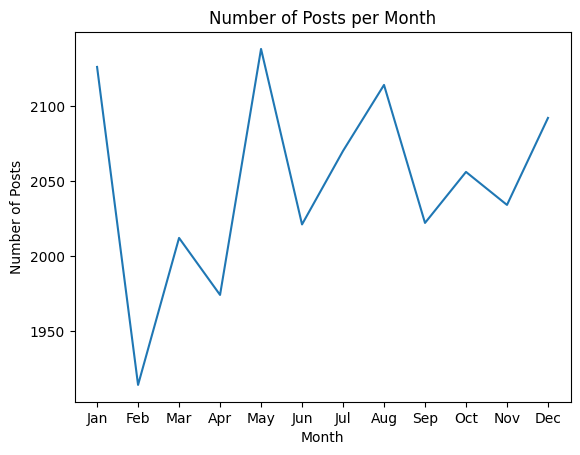

In [ ]:
monthly_posts = monthly_posts.sort_index()

# Plot the bar graph
sns.lineplot(x = monthly_posts.index, y = monthly_posts.values)

# Set the x-axis labels to month names
plt.xticks(monthly_posts.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Set the axis labels and title
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.title('Number of Posts per Month')

# Display the graph
plt.show()

## Exporting the clean and joined dataframe

In [ ]:
final_df.to_csv('accenture_cleaned_data.csv', index=False)